In [23]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/Credit.csv")
df.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


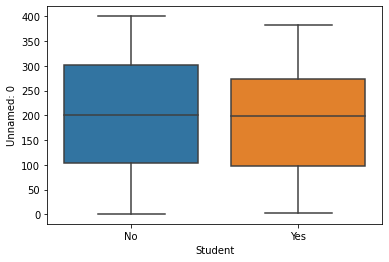

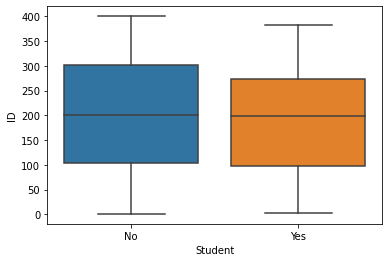

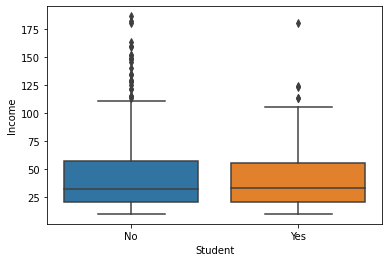

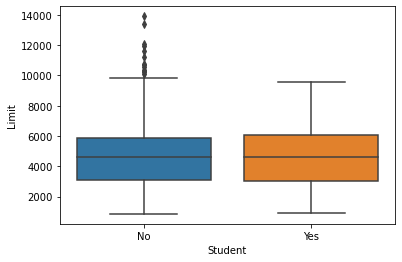

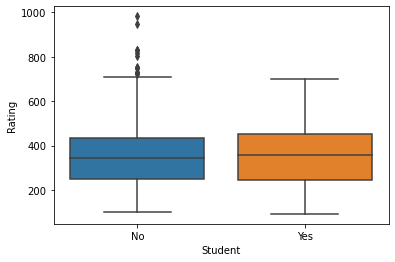

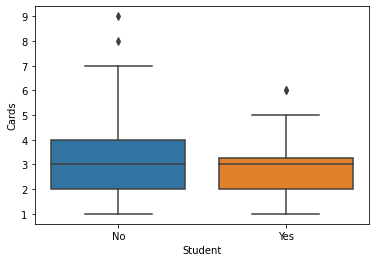

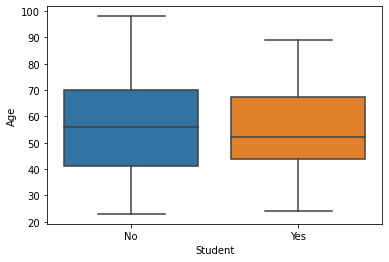

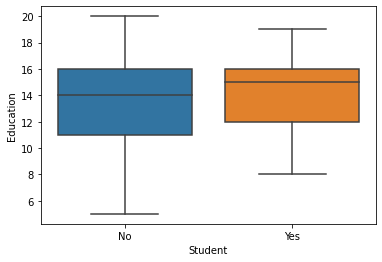

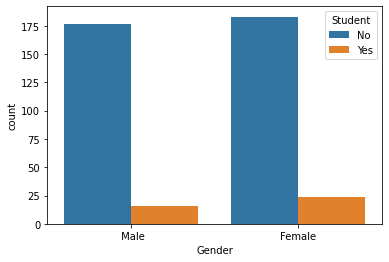

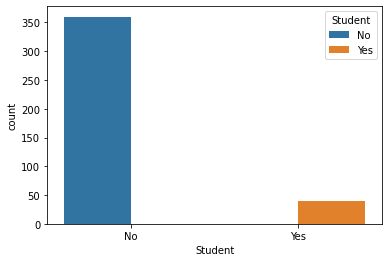

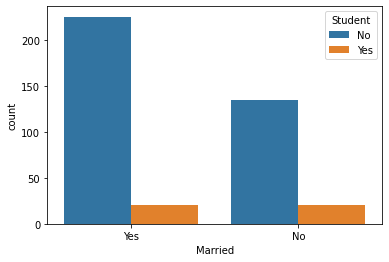

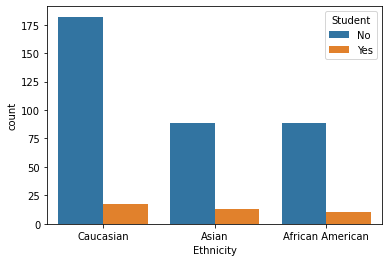

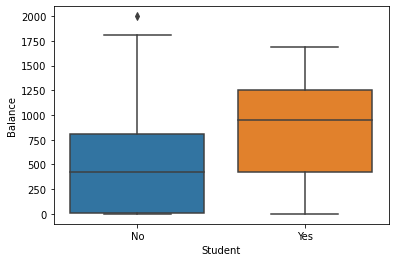

In [24]:
import matplotlib.pyplot as plt
import seaborn as sb
for i in df.columns:
    if df[i].dtypes == "object":
        sb.countplot(df[i], hue=df.Student)
    else:
        sb.boxplot(df.Student, df[i])
    plt.show()

In [25]:
cat = []
con = []
for i in df.columns:
    if df[i].dtypes == "object":
        cat.append(i)
    else:
        con.append(i)

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
B = pd.DataFrame(ss.fit_transform(df[con]), columns=con)
B.drop(labels=["Unnamed: 0", "ID"], axis=1, inplace=True)

In [27]:
B1 = pd.get_dummies(df[cat], drop_first=True).drop(labels=["Student_Yes"], axis=1)

In [28]:
B1.columns

Index(['Gender_Female', 'Married_Yes', 'Ethnicity_Asian',
       'Ethnicity_Caucasian'],
      dtype='object')

In [29]:
X = B1.join(B)
y = df["Student"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [30]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(random_state=20, solver="adam", hidden_layer_sizes=(10, 10), max_iter=1000)
model = mlpc.fit(X_train, y_train)
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9875

In [31]:
y

0       No
1      Yes
2       No
3       No
4       No
      ... 
395     No
396     No
397     No
398     No
399     No
Name: Student, Length: 400, dtype: object